# Import our dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl
import sklearn as skl
import numpy as np
import hvplot.pandas
import seaborn as sb
from path import Path

# Load the Cleaned Data.

In [4]:
file_path = Path("../Resources/prepare_data.csv")

In [5]:
cleaned_crime_df = pd.read_csv(file_path)
cleaned_crime_df.head()

,PdId,IncidntNum,Category,Descript,PdDistrict,Month,DayOfWeek,Time_of_Day,Address,ZipCode,Resolution
0,12005827212120,120058272,WEAPON LAWS,OTHER,SOUTHERN,Jan,Friday,Morning,800 Block of BRYANT ST,94103,"ARREST, BOOKED"
1,12005827212168,120058272,WEAPON LAWS,OTHER,SOUTHERN,Jan,Friday,Morning,800 Block of BRYANT ST,94103,"ARREST, BOOKED"
2,14105926363010,141059263,WARRANTS,WARRANT ARREST,BAYVIEW,Apr,Monday,Afternoon,KEITH ST / SHAFTER AV,94124,"ARREST, BOOKED"
3,16001366271000,160013662,NON-CRIMINAL,LOST PROPERTY,TENDERLOIN,Jan,Tuesday,Evening,JONES ST / OFARRELL ST,94108,NONE
4,16000274071000,160002740,NON-CRIMINAL,LOST PROPERTY,MISSION,Jan,Friday,Night,16TH ST / MISSION ST,94102,NONE


In [6]:
# Data dtypes.
cleaned_crime_df.dtypes

PdId            int64
IncidntNum      int64
Category       object
Descript       object
PdDistrict     object
Month          object
DayOfWeek      object
Time_of_Day    object
Address        object
ZipCode         int64
Resolution     object
dtype: object

In [7]:
# Unique values.
cleaned_crime_df.nunique()

PdId           147195
IncidntNum     114845
Category           17
Descript           40
PdDistrict         10
Month              12
DayOfWeek           7
Time_of_Day         4
Address         16049
ZipCode            25
Resolution          2
dtype: int64

# Data Selection

## The process of finding and selecting the most useful features in a dataset and removing unnecessary features that will decreaese training speed and model performance. 

In [8]:
# Drop columns with high single unique value features as they have zero variance.
cleaned_nunique = cleaned_crime_df.nunique()

plt.style.use('classic')

color = plt.cm.gray(np.linspace(0, 1, 15))
cleaned_nunique.plot.bar(color= color, figsize = (8, 4), grid=False)

plt.title('Number of Unique Values',fontsize = 12)

plt.tight_layout()

plt.savefig("/Users/lrinc/DataAustin2020/sanFranCrimePredictor/images/unique_values.png")

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/lrinc/DataAustin2020/sanFranCrimePredictor/images/unique_values.png'

In [9]:
cleaned_crime_df = cleaned_crime_df.drop(['PdId', 'IncidntNum', 'Address'], axis=1)
cleaned_crime_df.head()

,Category,Descript,PdDistrict,Month,DayOfWeek,Time_of_Day,ZipCode,Resolution
0,WEAPON LAWS,OTHER,SOUTHERN,Jan,Friday,Morning,94103,"ARREST, BOOKED"
1,WEAPON LAWS,OTHER,SOUTHERN,Jan,Friday,Morning,94103,"ARREST, BOOKED"
2,WARRANTS,WARRANT ARREST,BAYVIEW,Apr,Monday,Afternoon,94124,"ARREST, BOOKED"
3,NON-CRIMINAL,LOST PROPERTY,TENDERLOIN,Jan,Tuesday,Evening,94108,NONE
4,NON-CRIMINAL,LOST PROPERTY,MISSION,Jan,Friday,Night,94102,NONE


### The rest of the data will be kept as it seems it can help our model. 

In [10]:
cleaned_crime_df.nunique()

Category       17
Descript       40
PdDistrict     10
Month          12
DayOfWeek       7
Time_of_Day     4
ZipCode        25
Resolution      2
dtype: int64

# Data Processing

In [11]:
cleaned_crime_df["Category"] = cleaned_crime_df["Category"].astype('category')
cleaned_crime_df["Descript"] = cleaned_crime_df["Descript"].astype('category')
cleaned_crime_df["PdDistrict"] = cleaned_crime_df["PdDistrict"].astype('category')
cleaned_crime_df["Month"] = cleaned_crime_df["Month"].astype('category')
cleaned_crime_df["DayOfWeek"] = cleaned_crime_df["DayOfWeek"].astype('category')
cleaned_crime_df["Time_of_Day"] = cleaned_crime_df["Time_of_Day"].astype('category')
cleaned_crime_df["Resolution"] = cleaned_crime_df["Resolution"].astype('category')
cleaned_crime_df.dtypes


Category       category
Descript       category
PdDistrict     category
Month          category
DayOfWeek      category
Time_of_Day    category
ZipCode           int64
Resolution     category
dtype: object

In [12]:
# Label Encoding.
cleaned_crime_df["Categories"] = cleaned_crime_df["Category"].cat.codes
cleaned_crime_df["Descriptions"] = cleaned_crime_df["Descript"].cat.codes
cleaned_crime_df["PdDistricts"] = cleaned_crime_df["PdDistrict"].cat.codes
cleaned_crime_df["Months"] = cleaned_crime_df["Month"].cat.codes
cleaned_crime_df["Day"] = cleaned_crime_df["DayOfWeek"].cat.codes
cleaned_crime_df["TimeOfDay"] = cleaned_crime_df["Time_of_Day"].cat.codes
cleaned_crime_df["Resolutions"] = cleaned_crime_df["Resolution"].cat.codes
cleaned_crime_df.head()

,Category,Descript,PdDistrict,Month,DayOfWeek,Time_of_Day,ZipCode,Resolution,Categories,Descriptions,PdDistricts,Months,Day,TimeOfDay,Resolutions
0,WEAPON LAWS,OTHER,SOUTHERN,Jan,Friday,Morning,94103,"ARREST, BOOKED",16,25,7,4,0,2,0
1,WEAPON LAWS,OTHER,SOUTHERN,Jan,Friday,Morning,94103,"ARREST, BOOKED",16,25,7,4,0,2,0
2,WARRANTS,WARRANT ARREST,BAYVIEW,Apr,Monday,Afternoon,94124,"ARREST, BOOKED",15,39,0,0,1,0,0
3,NON-CRIMINAL,LOST PROPERTY,TENDERLOIN,Jan,Tuesday,Evening,94108,NONE,6,19,9,4,5,1,1
4,NON-CRIMINAL,LOST PROPERTY,MISSION,Jan,Friday,Night,94102,NONE,6,19,3,4,0,3,1


In [13]:
# Drop object columns.
cleaned_crime_df = cleaned_crime_df.drop(['Category', 'Descript', 'PdDistrict', 'Month', 'DayOfWeek', 'Time_of_Day', 'Resolution'], axis=1)
cleaned_crime_df.head()

,ZipCode,Categories,Descriptions,PdDistricts,Months,Day,TimeOfDay,Resolutions
0,94103,16,25,7,4,0,2,0
1,94103,16,25,7,4,0,2,0
2,94124,15,39,0,0,1,0,0
3,94108,6,19,9,4,5,1,1
4,94102,6,19,3,4,0,3,1


In [14]:
# Update the order of the columns.
cleaned_crime_df = cleaned_crime_df[['Categories', 'Descriptions', 'PdDistricts', 'Months', 'Day', 'TimeOfDay', 'ZipCode', 'Resolutions']]

cleaned_crime_df.head()

,Categories,Descriptions,PdDistricts,Months,Day,TimeOfDay,ZipCode,Resolutions
0,16,25,7,4,0,2,94103,0
1,16,25,7,4,0,2,94103,0
2,15,39,0,0,1,0,94124,0
3,6,19,9,4,5,1,94108,1
4,6,19,3,4,0,3,94102,1


In [19]:
# Saving cleaned data
file_path = "../Resources/encoded_df.csv"
cleaned_crime_df.to_csv(file_path, index=False)

# Pearson Correlation

In [16]:
# Calculating the Pearson Correlation.
pearsoncorr = cleaned_crime_df.corr(method='pearson')
pearsoncorr

,Categories,Descriptions,PdDistricts,Months,Day,TimeOfDay,ZipCode,Resolutions
Categories,1.000000,0.310303,-0.035102,0.000363,0.013499,0.013422,0.026019,-0.130063
Descriptions,0.310303,1.000000,-0.006933,0.001301,0.014232,0.010076,0.011633,-0.195331
PdDistricts,-0.035102,-0.006933,1.000000,-0.006507,0.007292,-0.011462,-0.242181,-0.046241
Months,0.000363,0.001301,-0.006507,1.000000,0.012608,0.005867,0.007510,0.016224
Day,0.013499,0.014232,0.007292,0.012608,1.000000,-0.012203,0.007898,-0.025107
TimeOfDay,0.013422,0.010076,-0.011462,0.005867,-0.012203,1.000000,0.009322,-0.008207
ZipCode,0.026019,0.011633,-0.242181,0.007510,0.007898,0.009322,1.000000,0.054990
Resolutions,-0.130063,-0.195331,-0.046241,0.016224,-0.025107,-0.008207,0.054990,1.000000


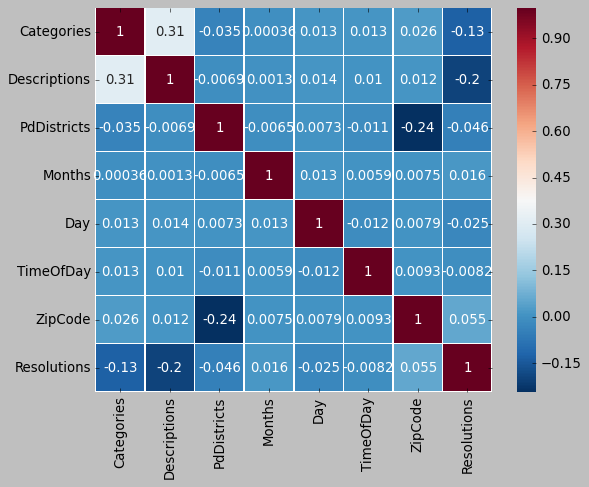

In [21]:
# Visualize the Pearson Correlation in order to make it easier to interpret.
fig = sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.savefig("/Users/bkirton/desktop/sanFranCrimePredictor/images/correlation_heatmap.png")

## Based on Pearson Correlation calculation, Categories and Descriptions have the strongest positive correlation.